# Objective
 The goal is to predict food delivery times based on customer location, restaurant location, weather, traffic, and other factors. This involves both data preprocessing and building predictive models using linear regression and logistic regression.
Phase 1: Data Collection and Exploratory Data Analysis (EDA)
### Step 1 - Data Import and Preprocessing
#### Dataset 
 Load the dataset (Food_Delivery_Time_Prediction.csv).
#### Handle Missing Values
 Check for any missing or inconsistent values in columns such as Distance, Delivery_Time, etc. and decide how to handle them, either through imputation or deletion.


#### Data Transformation


Encode Categorical Variables: Use one-hot encoding or label encoding for variables like Weather Conditions, Traffic Conditions, Vehicle Type.
Normalize/Standardize Numeric Columns: Normalize or standardize continuous features like Distance, Delivery_sTime, and Order_Cost for consistency.


In [48]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [49]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")

In [50]:
num_pipe = Pipeline([
    ('cleaning', SimpleImputer(strategy="most_frequent")),
    ('transformation', StandardScaler(with_mean=True))
])
cat_pipe = Pipeline([
    ('cleaning', SimpleImputer(strategy="most_frequent")),
    ('encoding', OneHotEncoder()),
    ('transformation', StandardScaler(with_mean=False))
])

In [51]:
transformer = ColumnTransformer([
    ('numerical', num_pipe,  ["Distance", "Delivery_Time", "Order_Cost" ]),
    ('categorical', cat_pipe,["Weather_Conditions", "Traffic_Conditions", "Vehicle_Type"])
])
transformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('cleaning',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('transformation',
                                                  StandardScaler())]),
                                 ['Distance', 'Delivery_Time', 'Order_Cost']),
                                ('categorical',
                                 Pipeline(steps=[('cleaning',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('transformation',
                                                  StandardScaler(with_mean=False))]),
                                 ['Weather_Conditions', 'Traffic_Conditions',
                                  'Vehicle_Type'])])

In [52]:
df_transformed = transformer.fit_transform(df)

In [53]:
column_list = transformer.get_feature_names_out()
column_list = [column.split('__')[1] for column in column_list]
column_list

['Distance',
 'Delivery_Time',
 'Order_Cost',
 'Weather_Conditions_Cloudy',
 'Weather_Conditions_Rainy',
 'Weather_Conditions_Snowy',
 'Weather_Conditions_Sunny',
 'Traffic_Conditions_High',
 'Traffic_Conditions_Low',
 'Traffic_Conditions_Medium',
 'Vehicle_Type_Bicycle',
 'Vehicle_Type_Bike',
 'Vehicle_Type_Car']

In [54]:
df_transformed = pd.DataFrame(df_transformed, columns=column_list)

# Step 2 - Exploratory Data Analysis (EDA)
## Descriptive Statistics
 Calculate the basic statistics for numerical features such as mean, median, mode, and variance.


## Correlation Analysis
 Visualize correlations between features and the target variable (Delivery_Time) to identify the most relevant predictors.


## Outlier Detection
 Detect outliers in numerical features using boxplots and handle them appropriately.




In [57]:
import seaborn as sns

In [64]:
df_transformed.describe()

,Distance,Delivery_Time,Order_Cost,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-1.643130e-16,3.730349e-16,-2.042810e-16,0.515580,0.631349,0.561951,0.600453,0.585049,0.825029,0.717741,0.725753,0.725753,0.670280
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509,1.002509
min,-1.608593e+00,-1.857269e+00,-1.688954e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.924313e-01,-7.896704e-01,-9.013569e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.806765e-01,7.662482e-02,-1.925947e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.325599e-01,8.789834e-01,9.076026e-01,0.000000,2.215259,0.000000,2.265862,2.294308,2.037108,2.111002,2.103632,2.103632,2.162194
max,1.963762e+00,1.652608e+00,1.737826e+00,2.455143,2.215259,2.341465,2.265862,2.294308,2.037108,2.111002,2.103632,2.103632,2.162194


In [65]:
df_transformed.columns

Index(['Distance', 'Delivery_Time', 'Order_Cost', 'Weather_Conditions_Cloudy',
       'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_High',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car'],
      dtype='object')

In [66]:
X = df_transformed[['Distance', 'Order_Cost', 'Weather_Conditions_Cloudy',
       'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_High',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car']]
y = df_transformed[['Delivery_Time']]

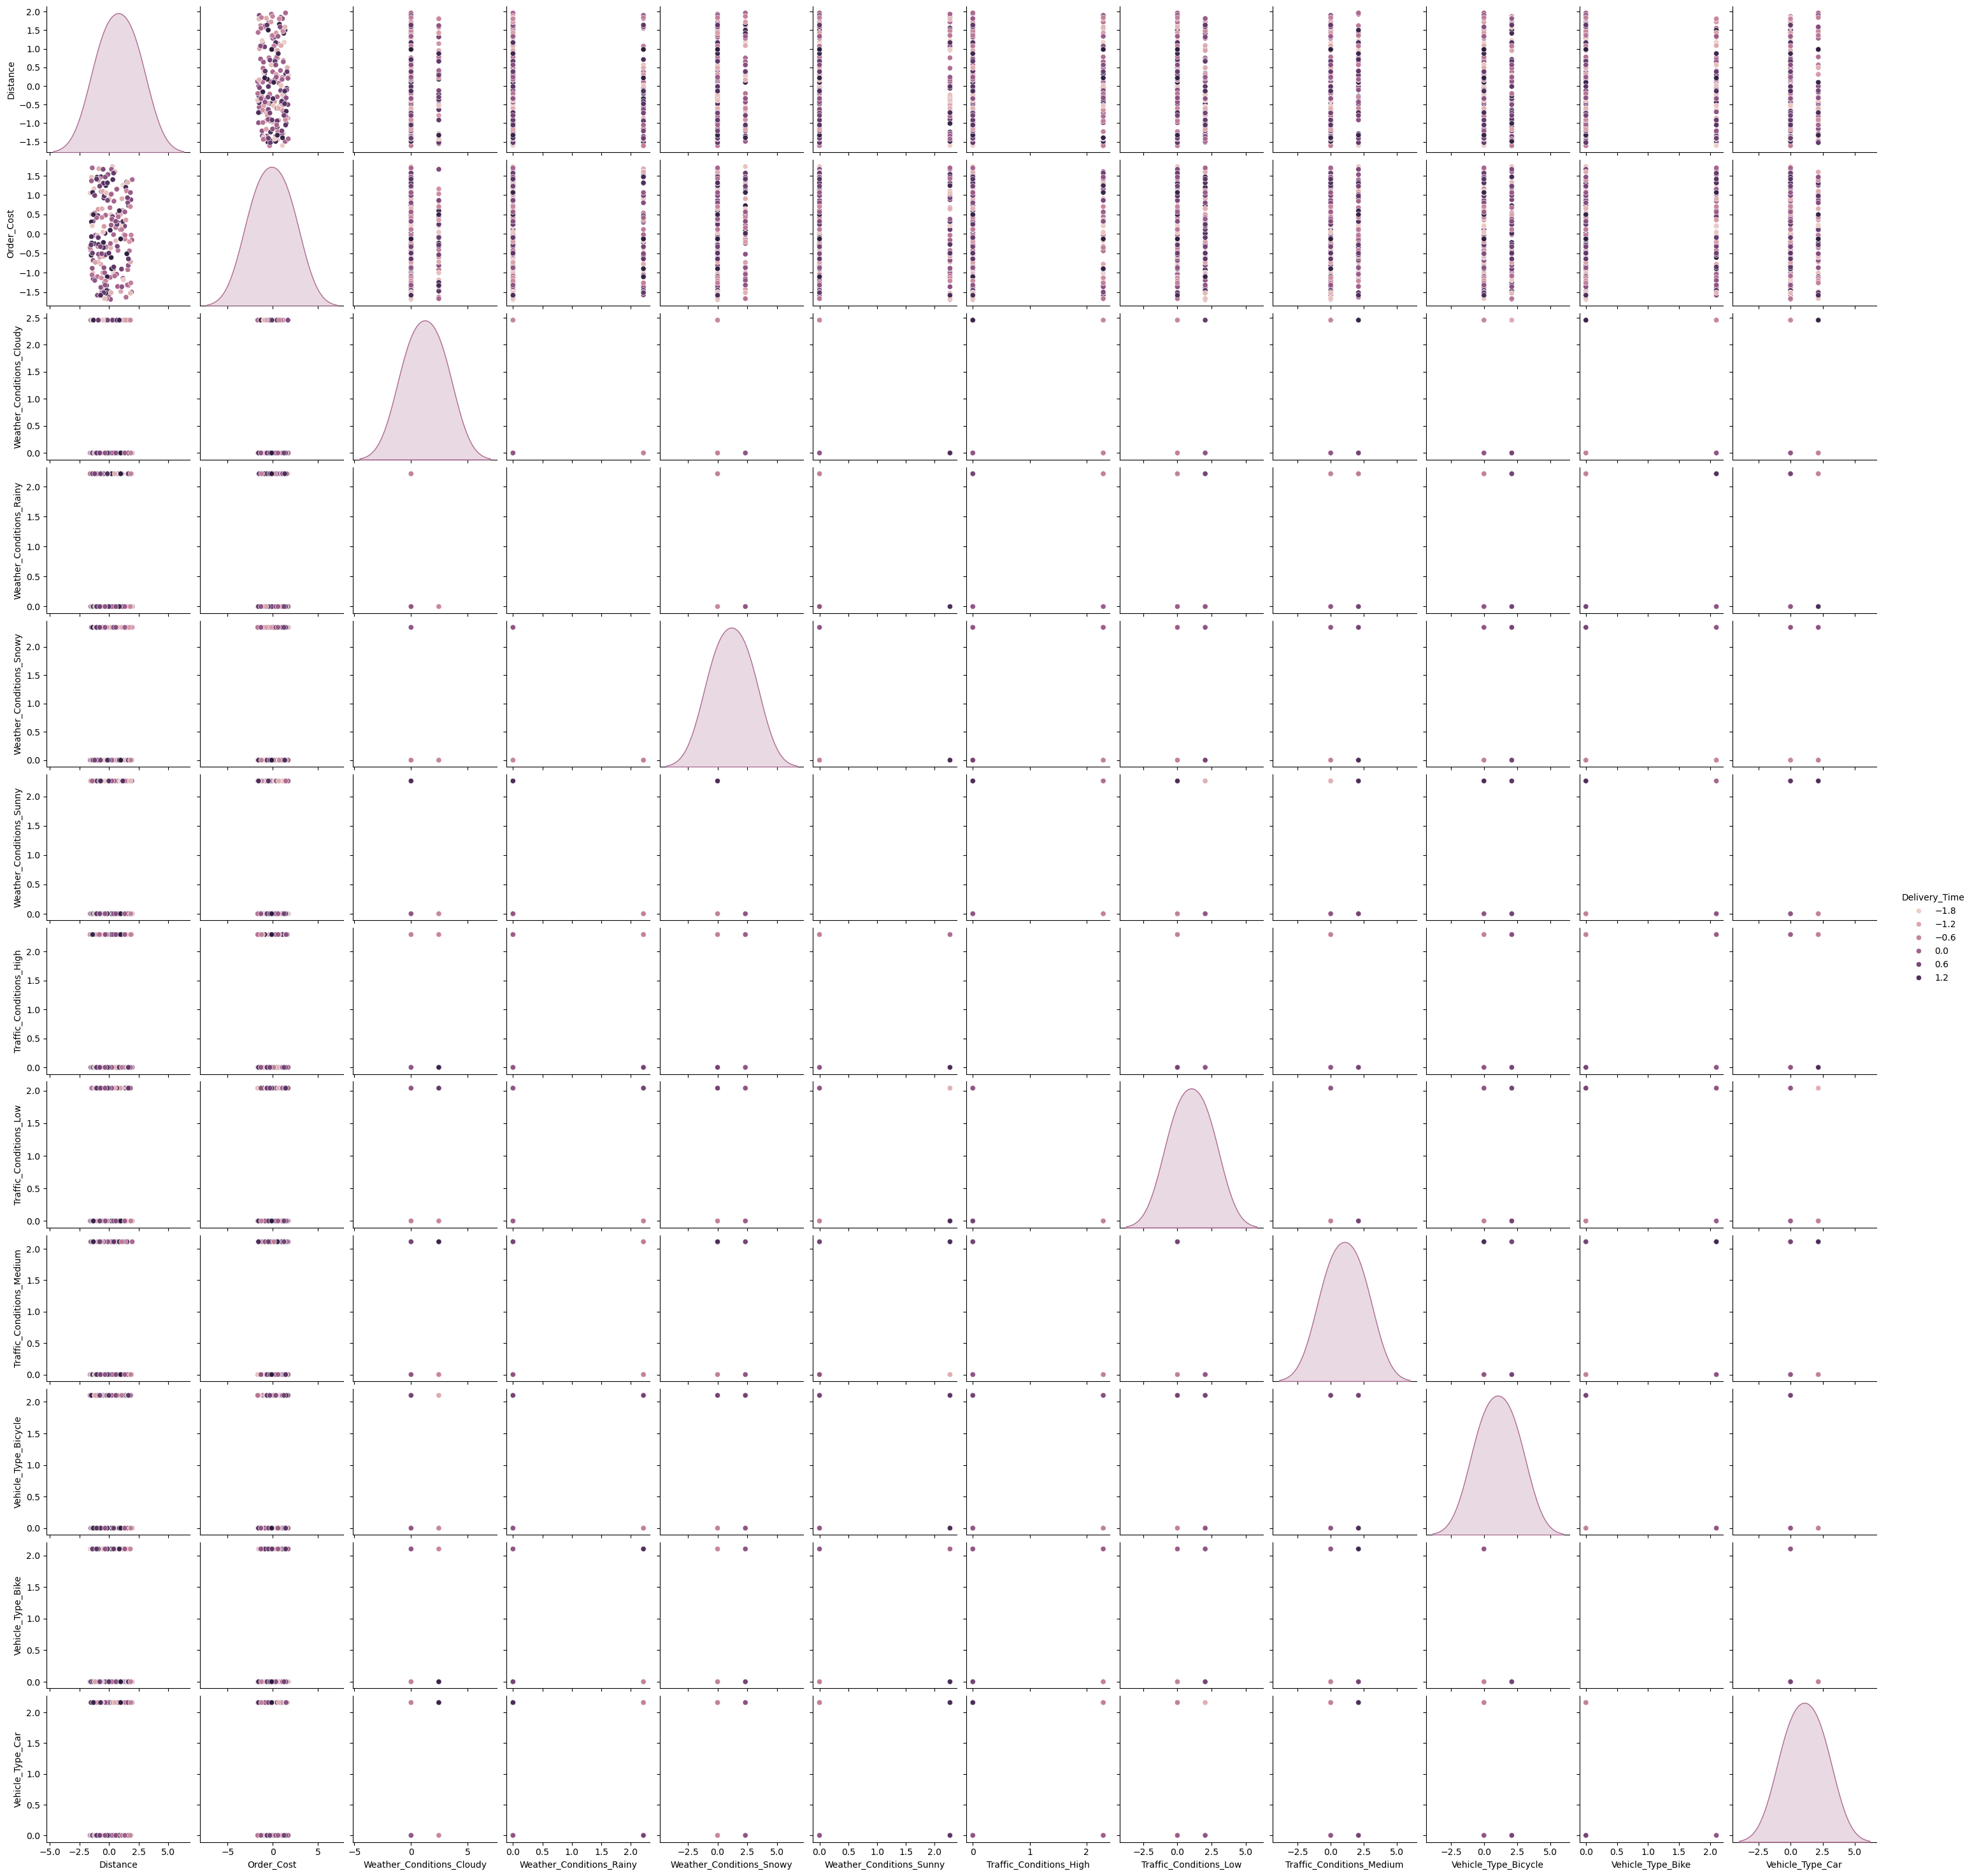

In [67]:
sns.pairplot(df_transformed,vars=X.columns, hue="Delivery_Time" )

In [68]:
df_transformed.corr()["Delivery_Time"]

Distance                    -0.075143
Delivery_Time                1.000000
Order_Cost                  -0.009307
Weather_Conditions_Cloudy   -0.012272
Weather_Conditions_Rainy     0.054402
Weather_Conditions_Snowy    -0.024621
Weather_Conditions_Sunny    -0.020492
Traffic_Conditions_High     -0.057563
Traffic_Conditions_Low       0.039714
Traffic_Conditions_Medium    0.011810
Vehicle_Type_Bicycle         0.093194
Vehicle_Type_Bike           -0.091859
Vehicle_Type_Car            -0.001372
Name: Delivery_Time, dtype: float64